<a href="https://colab.research.google.com/github/Tayyab7404/Tayyab7404/blob/main/IPL%20Score%20Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL Score Prediction using Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
import keras

### Loading the dataset:

In [ ]:
ipl = pd.read_csv('ipl_data.csv')

display(ipl)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


### Data Pre-processing:

In [ ]:
# Dropping certain features
features = ['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker']

df = ipl.drop(features, axis =1)

display(df)

X = df.drop(['total'], axis =1)
y = df['total']

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129


### Label Encoding:

In [ ]:
#Label Encoding to convert categorical variables into numerical format

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

### Train Test Split:

In [ ]:
# Train test Split: to split our data into train and test sets where feature
# variables are given as input in the method.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Scaling:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Define the Neural Network:

In [ ]:
# Define the neural network model
model = keras.Sequential([
    # Input layer
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),

    # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(512, activation='relu'),

    # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),

    # Output layer with linear activation for regression
    keras.layers.Dense(1, activation='linear') ])

# Compile the model with Huber loss

# You can adjust the 'delta' parameter as needed
huber_loss = tf.keras.losses.Huber(delta=1.0)

# Use Huber loss for regression
model.compile(optimizer='adam', loss=huber_loss)

### Model Training:

In [ ]:
# Train the model
model.fit(X_train_scaled,
          y_train,
          epochs=50,
          batch_size=64,
          validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 [==============================] - 7s 7ms/step - loss: 32.2844 - val_loss: 22.2141
Epoch 2/50
832/832 [==============================] - 7s 8ms/step - loss: 22.3312 - val_loss: 22.2724
Epoch 3/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2753 - val_loss: 22.1683
Epoch 4/50
832/832 [==============================] - 7s 8ms/step - loss: 22.2508 - val_loss: 22.0342
Epoch 5/50
832/832 [==============================] - 7s 8ms/step - loss: 22.1808 - val_loss: 22.1018
Epoch 6/50
832/832 [==============================] - 6s 7ms/step - loss: 22.1700 - val_loss: 21.8233
Epoch 7/50
832/832 [==============================] - 6s 7ms/step - loss: 22.1623 - val_loss: 21.8014
Epoch 8/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1078 - val_loss: 21.9234
Epoch 9/50
832/832 [==============================] - 7s 9ms/step - loss: 22.0849 - val_loss: 21.8325
Epoch 10/50
832/832 [==============================] - 6s 7ms/step - loss: 22.1177

<Axes: >

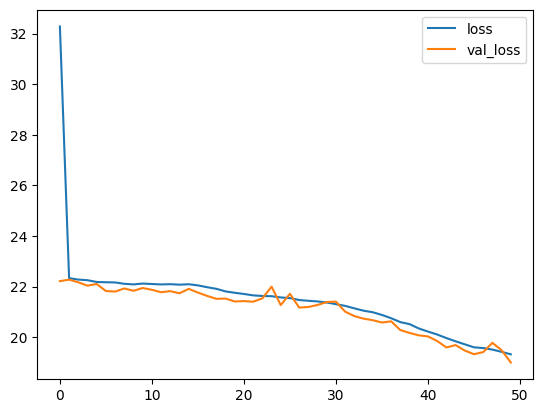

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

### Model Evaluation:

In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 [==============================] - 2s 3ms/step


19.48732408064809

### Let’s create an Interactive Widget:

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),
                         description='Select Venue:')

batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),
                                description='Select Batting Team:')

bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),
                                description='Select Bowling Team:')

striker = widgets.Dropdown(options=df['batsman'].unique().tolist(),
                           description='Select Striker:')

bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(),
                          description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output() # Clear the previous output

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])

        input = np.array([decoded_venue,
                          decoded_batting_team,
                          decoded_bowling_team,
                          decoded_striker,
                          decoded_bowler])

        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print("Predicted Score:",predicted_score)

### Score Predictor:

In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()